In [2]:
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd

In [3]:
x, y = make_classification(
    n_samples=100,
    n_features=1,
    n_classes=2,
    n_clusters_per_class=1,
    flip_y=0.03,
    n_informative=1,
    n_redundant=0,
    n_repeated=0
)

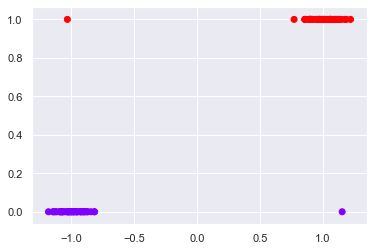

In [4]:
plt.scatter(x, y, c=y, cmap='rainbow')

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)

In [32]:
lr = LogisticRegression(C=1)
lr.fit(x_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
print(lr.coef_)
print(lr.intercept_)

[[2.88549182]]
[-0.30538427]


In [34]:
y_pred = lr.predict(x_test)

In [35]:
confusion_matrix(y_test, y_pred)

array([[11,  0],
       [ 1, 13]], dtype=int64)

In [36]:
from sklearn.metrics import accuracy_score, f1_score

In [37]:
accuracy_score(y_test, y_pred)

0.96

In [38]:
f1_score(y_test, y_pred)

0.962962962962963

In [39]:
lr.predict_proba(x_test)

array([[0.05430224, 0.94569776],
       [0.07560573, 0.92439427],
       [0.93378282, 0.06621718],
       [0.96290557, 0.03709443],
       [0.06085322, 0.93914678],
       [0.94808186, 0.05191814],
       [0.97601069, 0.02398931],
       [0.94393999, 0.05606001],
       [0.04939708, 0.95060292],
       [0.05897257, 0.94102743],
       [0.12727246, 0.87272754],
       [0.07136287, 0.92863713],
       [0.09334883, 0.90665117],
       [0.96345262, 0.03654738],
       [0.09176359, 0.90823641],
       [0.9687848 , 0.0312152 ],
       [0.07632306, 0.92367694],
       [0.95939441, 0.04060559],
       [0.96219017, 0.03780983],
       [0.95112823, 0.04887177],
       [0.96236553, 0.03763447],
       [0.07468479, 0.92531521],
       [0.06824426, 0.93175574],
       [0.93900816, 0.06099184],
       [0.07513634, 0.92486366]])

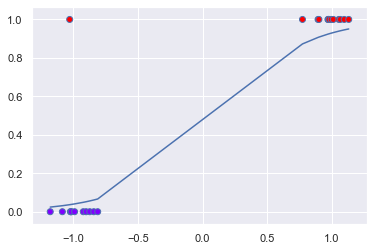

In [40]:
df = pd.DataFrame({'x': x_test[:,0], 'y': y_test})
df = df.sort_values(by='x')
from scipy.special import expit
sigmoid_function = expit(df['x'] * lr.coef_[0][0] + lr.intercept_[0]).ravel()
plt.plot(df['x'], sigmoid_function)
plt.scatter(df['x'], df['y'], c=df['y'], cmap='rainbow', edgecolors='b')